<h3 style='color:blue' align='center'>Telecom Customer Churn Prediction Using Artificial Neural Network (ANN)</h3>

**Group Members:**

Member 1:
Name: Rupali Patole
Roll No.: MCS21005
Email Id: mcs21005@iiitl.ac.in

Member 2:
Name: Aman Mehta
Roll no: MCS21011
Email Id: mcs21011@iiitl.ac.in


Member 3:
Name: Shreya Goswami
Roll No.: MCS21023
Email Id: mcs21023@iiitl.ac.in


**Introduction:** Customer churn prediction is to measure why customers are leaving a business. It can be applied in different business sectors like banking, retail, telecom, etc. For this project we will be implementing customer churn prediction for the telecom business. We will build a deep learning model to predict the churn and use precision, recall, f1-score to measure performance of our model.

**Dataset:** https://www.kaggle.com/blastchar/telco-customer-churn

**Algorithm:** Building ANN using tensorflow / keras

**Steps:**
1.	Data Loading
2.	Data analysis
3.	Data cleaning
4.	Data splitting (Training set and Test set)
5.	ANN Model Building 
6.	Evaluation Metrics (Accuracy, F1 score, Precision, Recall)
7.  Hyperparameter Tuning
8.  Performance Metrics (ROC Analysis)
9.  Conclusion 
10. Future Scope (Offers and Improving Churn Rate)

### Imports

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from keras.layers import Activation, Dense, Dropout
import tensorflow as tf
from keras.models import Sequential
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve, accuracy_score

## Data Loading

In [73]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1405,6960-HVYXR,Female,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,76.00,76,Yes
1378,1697-BCSHV,Female,0,Yes,Yes,58,Yes,Yes,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),66.80,3970.4,No
2663,5140-FOMCQ,Female,0,Yes,No,59,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),109.15,6557.75,No
4707,0961-ZWLVI,Male,0,No,Yes,49,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),109.20,5290.45,No
1998,7615-ESMYF,Female,0,Yes,No,2,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,44.60,97.1,Yes


## Data analysis and Data cleaning

#### Dropping customerID column as it is of no use

In [74]:
df.drop('customerID',axis='columns',inplace=True)

In [75]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [76]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

#### Finding out rows that are blank strings

In [77]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [78]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [79]:
df.shape

(7043, 20)

In [80]:
df.iloc[488].TotalCharges

' '

In [81]:
df[df.TotalCharges!=' '].shape

(7032, 20)

#### Remove rows with space in TotalCharges

In [82]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [83]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [84]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [85]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [86]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [87]:
df1.Churn.value_counts() 

No     5163
Yes    1869
Name: Churn, dtype: int64

No handles with labels found to put in legend.


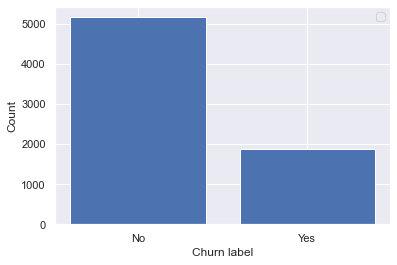

In [88]:
plt.bar(x = df1['Churn'].unique(), height = df1.Churn.value_counts())
plt.legend()
plt.xlabel("Churn label")
plt.ylabel("Count")
plt.show()

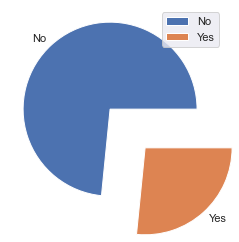

In [89]:
plt.pie(df1.Churn.value_counts(), labels = df1['Churn'].unique(), explode = [0.1, 0.5])
plt.legend()
plt.show()

## Data Visualization

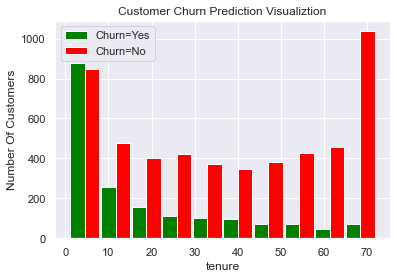

In [90]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

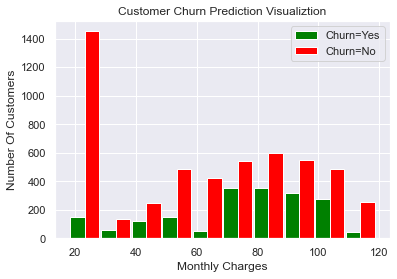

In [91]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

#### Understanding the Business Problem To get an understanding of data and give our analysis some direction we can come up with some basic questions as follows:

1.How gender, partner and dependents are related to churn?


2.How tenure has an impact on churn?


3.As the dataset is about telecom industry, we need some insights on phone and internet services!


4.Does Tech support have any impact on churn?


5.Is there any relationship of churn with monthly charges or total charges?


6.How is the service for customers who opted for streaming?


7.How contract is impacting business the most?




In [92]:
df1.groupby(['gender', 'Partner', 'Dependents', 'Churn']).size()

gender  Partner  Dependents  Churn
Female  No       No          No       1068
                             Yes       587
                 Yes         No        112
                             Yes        33
        Yes      No          No        618
                             Yes       187
                 Yes         No        746
                             Yes       132
Male    No       No          No       1089
                             Yes       536
                 Yes         No        170
                             Yes        44
        Yes      No          No        615
                             Yes       233
                 Yes         No        745
                             Yes       117
dtype: int64

In [93]:
df1.groupby(['gender', 'Partner', 'Dependents', 'Churn']).size().reset_index(name='Count')

,gender,Partner,Dependents,Churn,Count
0,Female,No,No,No,1068
1,Female,No,No,Yes,587
2,Female,No,Yes,No,112
3,Female,No,Yes,Yes,33
4,Female,Yes,No,No,618
5,Female,Yes,No,Yes,187
6,Female,Yes,Yes,No,746
7,Female,Yes,Yes,Yes,132
8,Male,No,No,No,1089
9,Male,No,No,Yes,536


### 1. How gender, partner and dependents are related to churn?

In [94]:
fig = px.treemap(df1.groupby(['gender', 'Partner', 'Dependents', 'Churn']).size().reset_index(name='Count'), 
                 path=['gender', 'Partner', 'Dependents', 'Churn'], values='Count', color='Churn', 
                 title='1. How gender, partner and dependents are related to churn?')

fig.show()

##### Observation: Whether male or female, if they do not have partner or dependents, they are more likely to churn! 2. Does tenure has any impact on churn?

In [95]:
df1.groupby(['tenure', 'Churn']).size().reset_index(name='count')

,tenure,Churn,count
0,1,No,233
1,1,Yes,380
2,2,No,115
3,2,Yes,123
4,3,No,106
...,...,...,...
139,70,Yes,11
140,71,No,164
141,71,Yes,6
142,72,No,356


### 2. Does tenure has any impact on churn?

In [96]:
fig = px.histogram(df1.groupby(['tenure', 'Churn']).size().reset_index(name='count'), 
                   x="tenure", y="count", color="Churn", marginal="rug", color_discrete_map={"Yes":"#E45756", "No":"#1CBE4F"}, 
                   title="2. Does tenure has any impact on churn?")

fig.show()

##### Observation: During 0-10 years of tenure, we can see maximum churning. As the customer turns old, they might get habituated using same telecom service 3. As the dataset is about telecom industry, we need some insights on phone and internet services!

In [97]:
df1.groupby(['Churn', 'PhoneService', 'InternetService']).size()

Churn  PhoneService  InternetService
No     No            DSL                 510
       Yes           DSL                1447
                     Fiber optic        1799
                     No                 1407
Yes    No            DSL                 170
       Yes           DSL                 289
                     Fiber optic        1297
                     No                  113
dtype: int64

### 3. As the dataset is about telecom industry, we need some insights on phone and internet services!

In [98]:
fig = px.sunburst(df1.groupby(['Churn', 'PhoneService', 'InternetService']).size().reset_index(name='count'), 
                  path = ['Churn', 'PhoneService', 'InternetService'], values = 'count', 
                  title='3. As the dataset is about telecom industry, we need some insights on phone and internet services!')

fig.show()

In [99]:
np.unique(df1.TechSupport)

array(['No', 'No internet service', 'Yes'], dtype=object)

In [100]:
data_techSupport_yes = df1[df1['TechSupport'] == 'Yes']
data_techSupport_no = df1[df1['TechSupport'] == 'No'] 

#### Customers who took tech support

In [101]:
data_techSupport_yes.groupby(['tenure', 'Churn']).size()

tenure  Churn
1       No        19
        Yes       14
2       No         8
        Yes       11
3       No        20
                ... 
70      Yes        8
71      No        89
        Yes        2
72      No       221
        Yes        3
Length: 140, dtype: int64

In [102]:
fig = px.histogram(data_techSupport_yes.groupby(['tenure', 'Churn']).size().reset_index(name='count'), 
                   x="tenure", y="count", marginal="rug", color="Churn", color_discrete_map={"Yes":"#E45756", "No":"#1CBE4F"}, 
                   title="Statistics of customers opted for tech support with churning")

fig.show()

#### Customers who didn't took tech support

In [103]:
data_techSupport_no.groupby(['tenure', 'Churn']).size()

tenure  Churn
1       No       106
        Yes      308
2       No        66
        Yes      106
3       No        53
                ... 
70      Yes        3
71      No        34
        Yes        4
72      No        69
        Yes        3
Length: 144, dtype: int64

In [104]:
fig = px.histogram(data_techSupport_no.groupby(['tenure', 'Churn']).size().reset_index(name='count'),
                   x='tenure', y='count',color='Churn', marginal='rug', color_discrete_map={"Yes":"#E45756", "No":"#1CBE4F"}, 
                   title="Statistics of customers opted for tech support with churning")

fig.show()

##### Observations: People with Phone services (yes) and 'Fiber optic' Internet Service are churning more

### 4. Does customers opted for tech support stayed for longer tenure with less churn?

In [105]:
fig = px.sunburst(df1.groupby(['Churn', 'TechSupport', 'tenure']).size().reset_index(name='count'), 
                            path=['Churn', 'TechSupport', 'tenure'], values='count', 
                            title='4. Does customers opted for tech support stayed for longer tenure with less churn?')

fig.show()

##### Observations: more churning takes place in first 10 yrs (max in first year itself), for customers with or without tech support. But Churning is more in case of "without tech support" customers

### 5. Is there any relationship of churn with monthly charges or total charges?




[Text(0.5, 1.0, '5. Is there any relationship of churn with monthly charges?')]

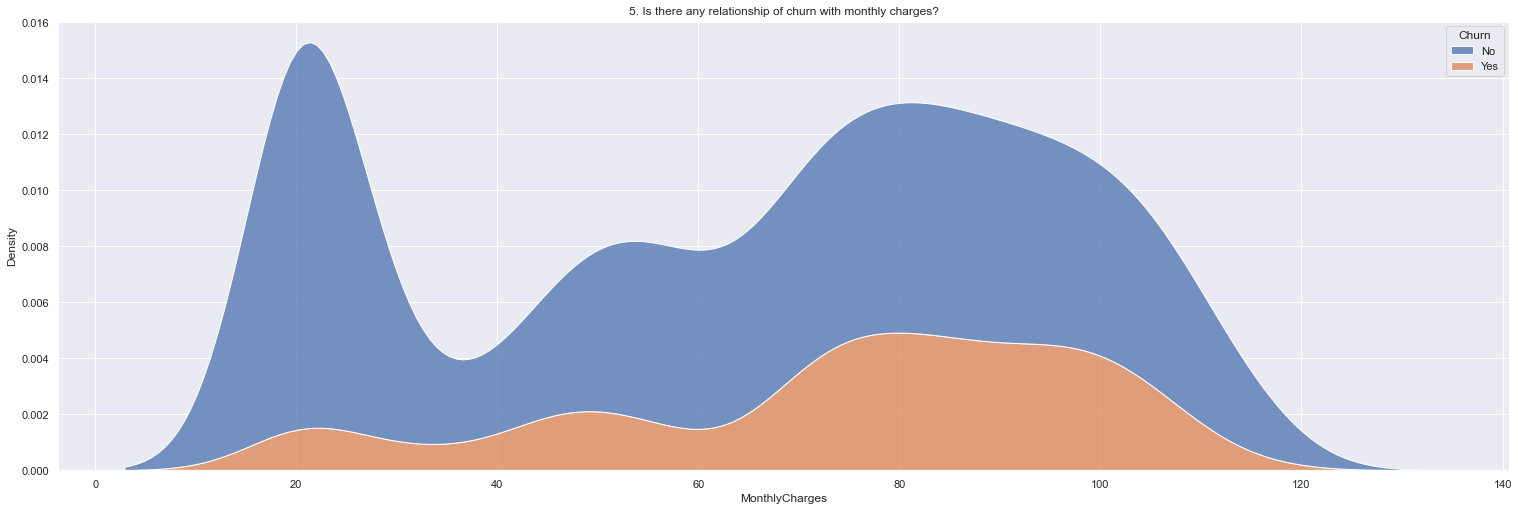

In [106]:
sns.set(rc={'figure.figsize':(26, 8.27)}) # rc - seems row, column
sns.kdeplot(data = df1, x="MonthlyCharges", hue="Churn", multiple="stack").set(title= "5. Is there any relationship of churn with monthly charges?")

##### Observations: As the monthy charges are incresing, we can see the density increasing too (60-120), which means more churning with increasing monthly charges

[Text(0.5, 1.0, "Did customers' total charges relate with churn?")]

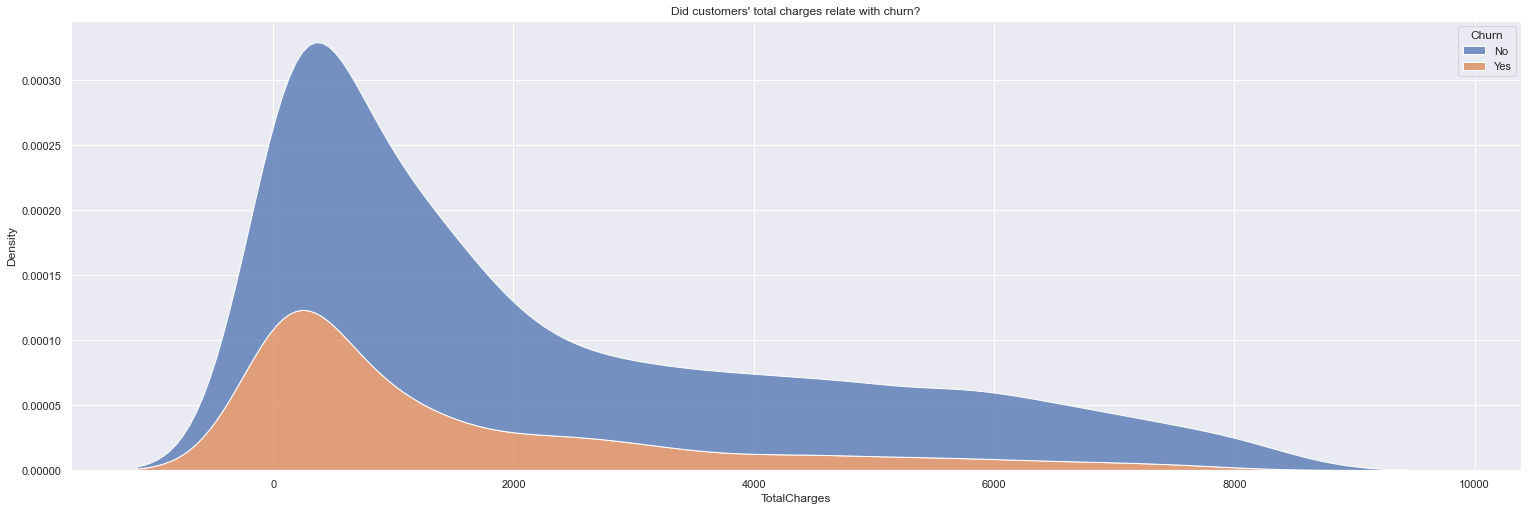

In [107]:
sns.set(rc={'figure.figsize':(26,8.27)})
sns.kdeplot(data=df1, x="TotalCharges", hue="Churn", multiple="stack").set(title="Did customers' total charges relate with churn?")

##### Observation: It is quite opposite of what has been seen for monthly charges. Here high churning occurs when total charges is less, 0-2000 total charges have maximum churning



In [108]:
df1.groupby(['Churn', 'StreamingTV']).size()

Churn  StreamingTV        
No     No                     1867
       No internet service    1407
       Yes                    1889
Yes    No                      942
       No internet service     113
       Yes                     814
dtype: int64

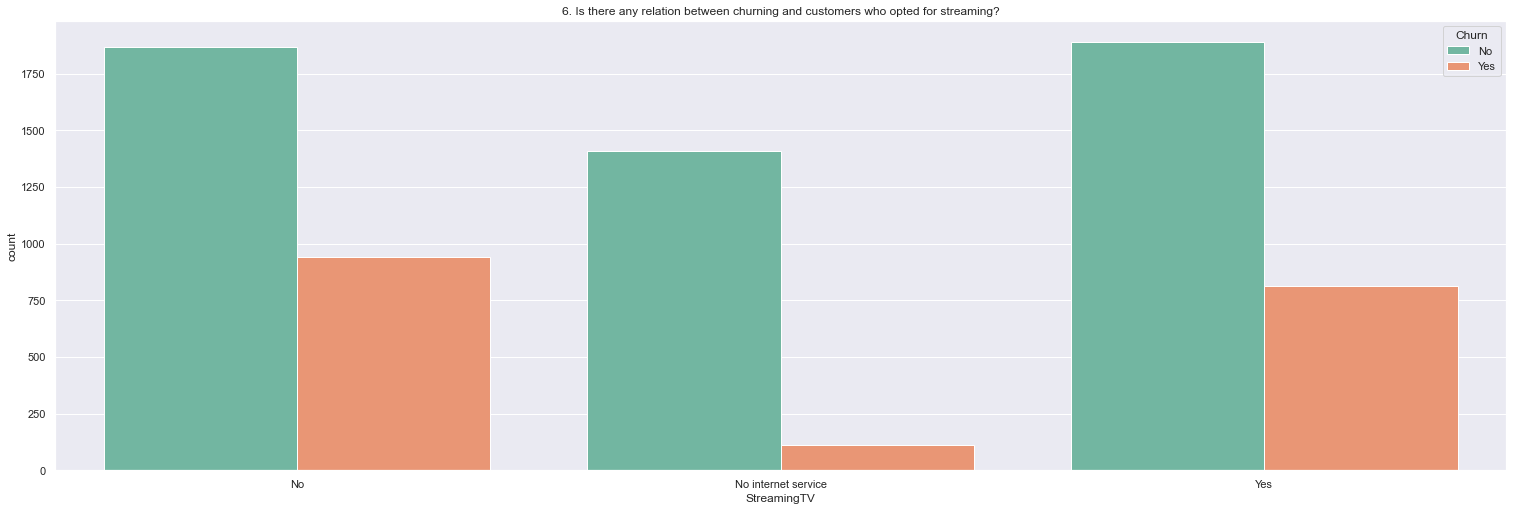

In [109]:
ax = sns.barplot(x="StreamingTV", y="count", hue="Churn", data = df1.groupby(['Churn', 'StreamingTV']).size().reset_index(name='count'), 
                 palette="Set2").set(title = "6. Is there any relation between churning and customers who opted for streaming?")

### 6. Is there any relation between churning and customers who opted for streaming?

In [110]:
fig = px.sunburst(df1.groupby(['Churn', 'InternetService', 'StreamingTV']).size().reset_index(name='count'), 
                            path=['Churn', 'InternetService', 'StreamingTV'], values='count', 
                            title='6. Is there any relation between churning and customers who opted for streaming?')

fig.show()

In [111]:
fig = px.sunburst(df1.groupby(['Churn', 'StreamingTV']).size().reset_index(name='count'), 
                            path=['Churn', 'StreamingTV'], values='count', 
                            title='Do customers opted for streaming, faced issue with the service?')

fig.show()

##### Observation: Churning is being observed equally for the 'Yes', 'No' group of whether connected StreamingTv or not!

In [112]:
df1.groupby(['Churn', 'StreamingMovies']).size()

Churn  StreamingMovies    
No     No                     1843
       No internet service    1407
       Yes                    1913
Yes    No                      938
       No internet service     113
       Yes                     818
dtype: int64

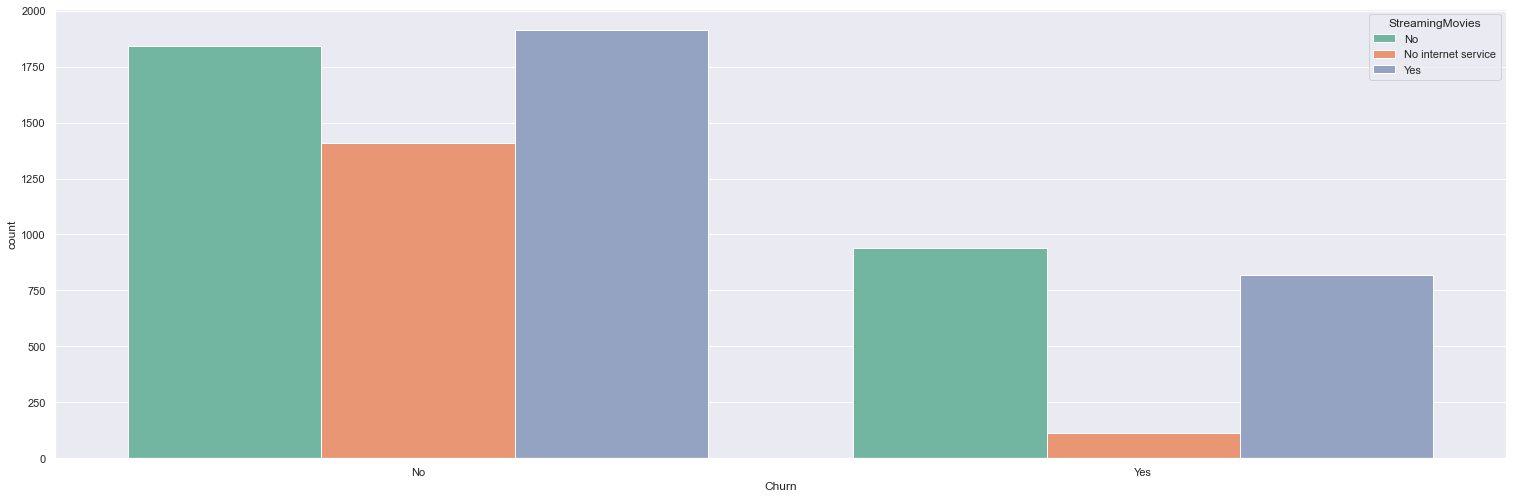

In [113]:
ax = sns.barplot(x="Churn", y="count", hue="StreamingMovies", 
                 data = df1.groupby(['Churn', 'StreamingMovies']).size().reset_index(name="count"), palette="Set2").set(title="")

##### Observation: Churning is being observed equally for both the 'Yes', 'No' group of StreamingMovies


In [114]:
df1.groupby(['Churn', 'Contract']).size()

Churn  Contract      
No     Month-to-month    2220
       One year          1306
       Two year          1637
Yes    Month-to-month    1655
       One year           166
       Two year            48
dtype: int64

### 7. How contract is impacting business?

In [115]:
fig = px.sunburst(df1.groupby(['Churn', 'Contract']).size().reset_index(name='count'), 
                  path=['Churn', 'Contract'], values='count', 
                  title='7. How contract is impacting business?')

fig.show()

##### Observations: clearly visible that customers with month-to-month contract are the highest churners

#### Senior Citizen vs Churning

In [116]:
fig = px.sunburst(df1.groupby(['Churn', 'SeniorCitizen']).size().reset_index(name='count'), 
                  path=['Churn', 'SeniorCitizen'], values='count', 
                  title='How being or non being SeniorCitizen is impacting Churning?')

fig.show()

In [117]:
fig = px.sunburst(df1.groupby(['Churn', 'MultipleLines']).size().reset_index(name='count'), 
                  path=['Churn', 'MultipleLines'], values='count', 
                  title='How having MultipleLines is impacting Churning?')

fig.show()

##### Observation: Having (yes) multiple lines have almost equal impact as not having (No) multiple lines

## Observations Based on Visualizations

#### Observation-1: Whether male or female, if they do not have partner or dependents, they are more likely to churn!!


#### Observation-2: During 0-10 years of tenure, we can see maximum churning. As the customer turns old, they might get habituated using same telecom service 


#### Observations-3: People with Phone services (yes) and 'Fiber optic' Internet Service are churning more 


#### Observations-4:more churning takes place in first 10 yrs, for customers with or without tech support. But Churning is more in case of "without tech support" customers 


#### Observations-5: As the monthy charges are incresing, we can see the density increasing too (60-120), which means more churning with increasing monthly charges 


#### Observation-6: It is quite opposite of what has been seen for monthly charges. Here high churning occurs in early phase itself, 0-2000 total charges have maximum churning 


#### Observation-7: Churning is being observed equally for the 'Yes', 'No' group of whether connected StreamingTv or not! 


#### Observation-8: Churning is being observed equally for both the 'Yes', 'No' group of StreamingMovies 


#### Observations-9: clearly visible that customers with month-to-month contract are the highest churners 


#### Observation-10: Most churners are non-senior citizens. Although we should also consider the fact that, data is more for non-senior citizens (5:1)

#### Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [118]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [119]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


#### Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [120]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [121]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


#### Convert Yes and No to 1 or 0

In [122]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [123]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [124]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [125]:
df1.gender.unique()

array([1, 0], dtype=int64)

#### One hot encoding for categorical columns

In [126]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [127]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6605,0,1,0,0,66,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
2351,1,0,0,0,49,1,0,1,1,1,...,1,0,0,0,0,1,1,0,0,0
5614,0,0,1,1,68,1,1,1,1,0,...,0,1,0,0,1,0,1,0,0,0
1419,0,0,1,1,63,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5346,0,0,0,0,66,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0


In [128]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [129]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [130]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

## Data Splitting

### Train Test Split

In [131]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [132]:
X_train.shape

(5625, 26)

In [133]:
X_test.shape

(1407, 26)

In [134]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [135]:
len(X_train.columns)

26

## Model Building

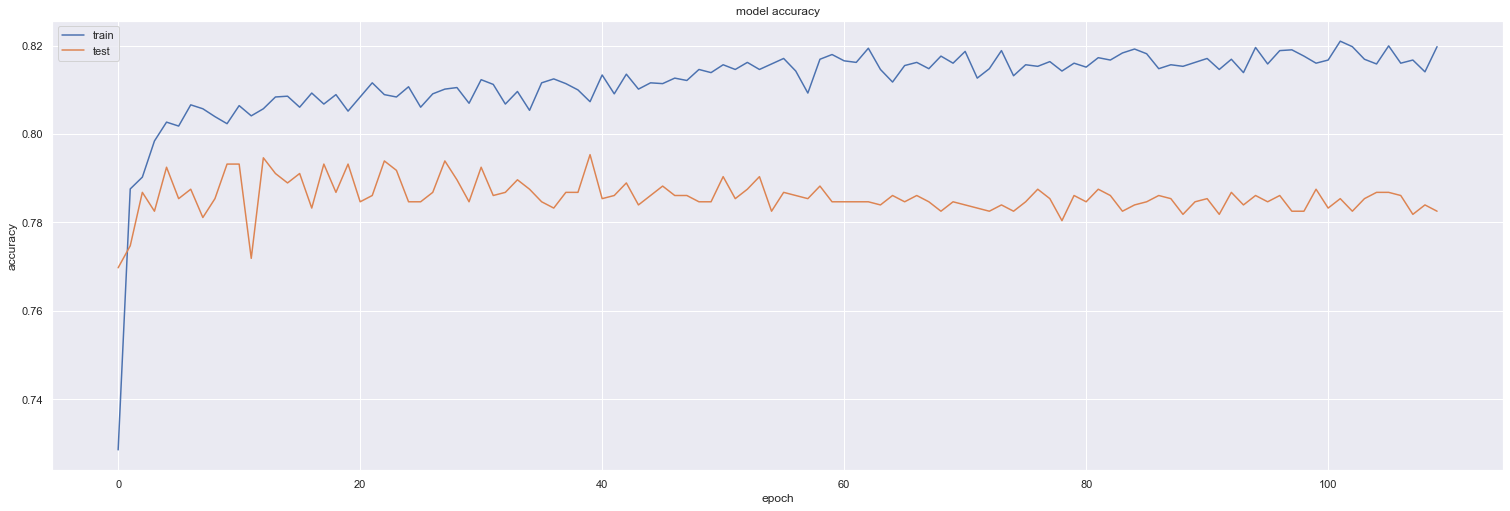

In [136]:
nn_model = Sequential()
nn_model.add(Dense(64,kernel_regularizer=tf.keras.regularizers.l2(0.001), input_dim=26, activation='relu' ))
nn_model.add(Dropout(rate=0.2))
nn_model.add(Dense(8,kernel_regularizer=tf.keras.regularizers.l2(0.001),activation='relu'))
nn_model.add(Dropout(rate=0.1))
nn_model.add(Dense(1, activation='sigmoid'))
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay( 0.001,
      decay_steps=(X_train.shape[0]/32)*50,
      decay_rate=1,
      staircase=False)
#This time decay means for every 50 epochs the learning rate will be half of 0.001 value
def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)
def get_callbacks():
    return [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=70,restore_best_weights=True)]
nn_model.compile(loss = "binary_crossentropy", 
                  optimizer = get_optimizer(), 
                  metrics=['accuracy'])
    
history = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32,   callbacks=get_callbacks(),verbose=0)

plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

### Evaluation Metrics

In [137]:
yprednn=nn_model.predict(X_test)
yprednn=yprednn.round()
print('Neural Network:\n {}\n'.format(
    metrics.classification_report(yprednn, y_test)))
nn_conf_matrix=metrics.confusion_matrix(yprednn,y_test)
conf_mat_nn = pd.DataFrame(nn_conf_matrix, 
    columns=["Predicted NO", "Predicted YES"], 
    index=["Actual NO", "Actual YES"])
print(conf_mat_nn)

Neural Network:
               precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      1045
         1.0       0.59      0.67      0.63       362

    accuracy                           0.80      1407
   macro avg       0.73      0.75      0.74      1407
weighted avg       0.80      0.80      0.80      1407


            Predicted NO  Predicted YES
Actual NO            878            167
Actual YES           121            241


#### Accuracy with ANN Model: 80.0%

### Hyperparameter Tuning

In [138]:
gb = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [139]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}
0.8072888888888891


In [140]:
gb = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 80)
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test) 

In [141]:
print("Accuracy with Gradient Booting Classifier: {0:.5}%".format(accuracy_score(y_test, y_pred)*100)) 


Accuracy with Gradient Booting Classifier: 80.028%


### Performance Metrics

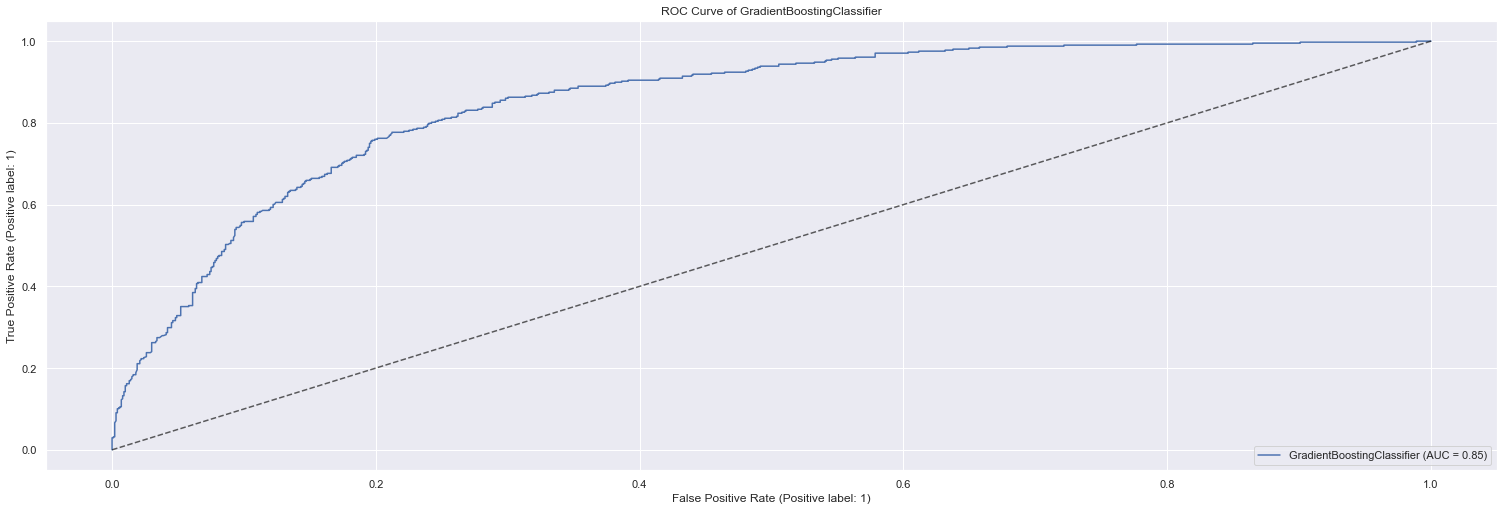

In [142]:
gbc_disp = plot_roc_curve(gb, X_test, y_test)
plt.title("ROC Curve of {}".format(type(gb).__name__))
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show()

# Conslusion:

1. When we built a Model with  Artificial Neural Network using Tensorflow/Keras, we found that the accuracy was 80%.


2. Hyperparameter Tuning using Gradient Boosting Classifier yeilded an accuracy score of 80.028% and an AUC value of 0.85. 







Thus, we can conclude that our ANN Model has performed appropriately. 



## Offers and Improving Churn Rate:

1. Discounts: As the most important feature is total charges, followed by monthly charges, potential churners identified through the modelling should be offered huge discount on next month or months contract. This covers 80 % of the reasons identified for churning. For this modelling, the False Negative Rate should be minimized or Recall should be maximized so that the discounts are sent to maximum of the potential churners.



2. New contract: A six month or four month contract should be implemented. This will encourage the reserved customers who want shorter contracts and will increase their tenure on the service thus making them less likely to churn.



3. Online Security: This service should be promoted more and offered complimentary/free for trial periods depending on cost to company. The customers who do not have online security are more likely to churn and thus this offer could be combined with the first one mentioned and discount could only be offered on this.



4. Fiber optic: The fiber optic internet is costly and thus should either be promoted to appropriate target audience or better technology can be implemented to cut cost on this service. Ultimately the market research team has to decide the break even point for this service, whether it is profiting as much as the loss of customers it is causing.



5. Another method to quantify the offers to be made is using manually generated features and their effect on the model.